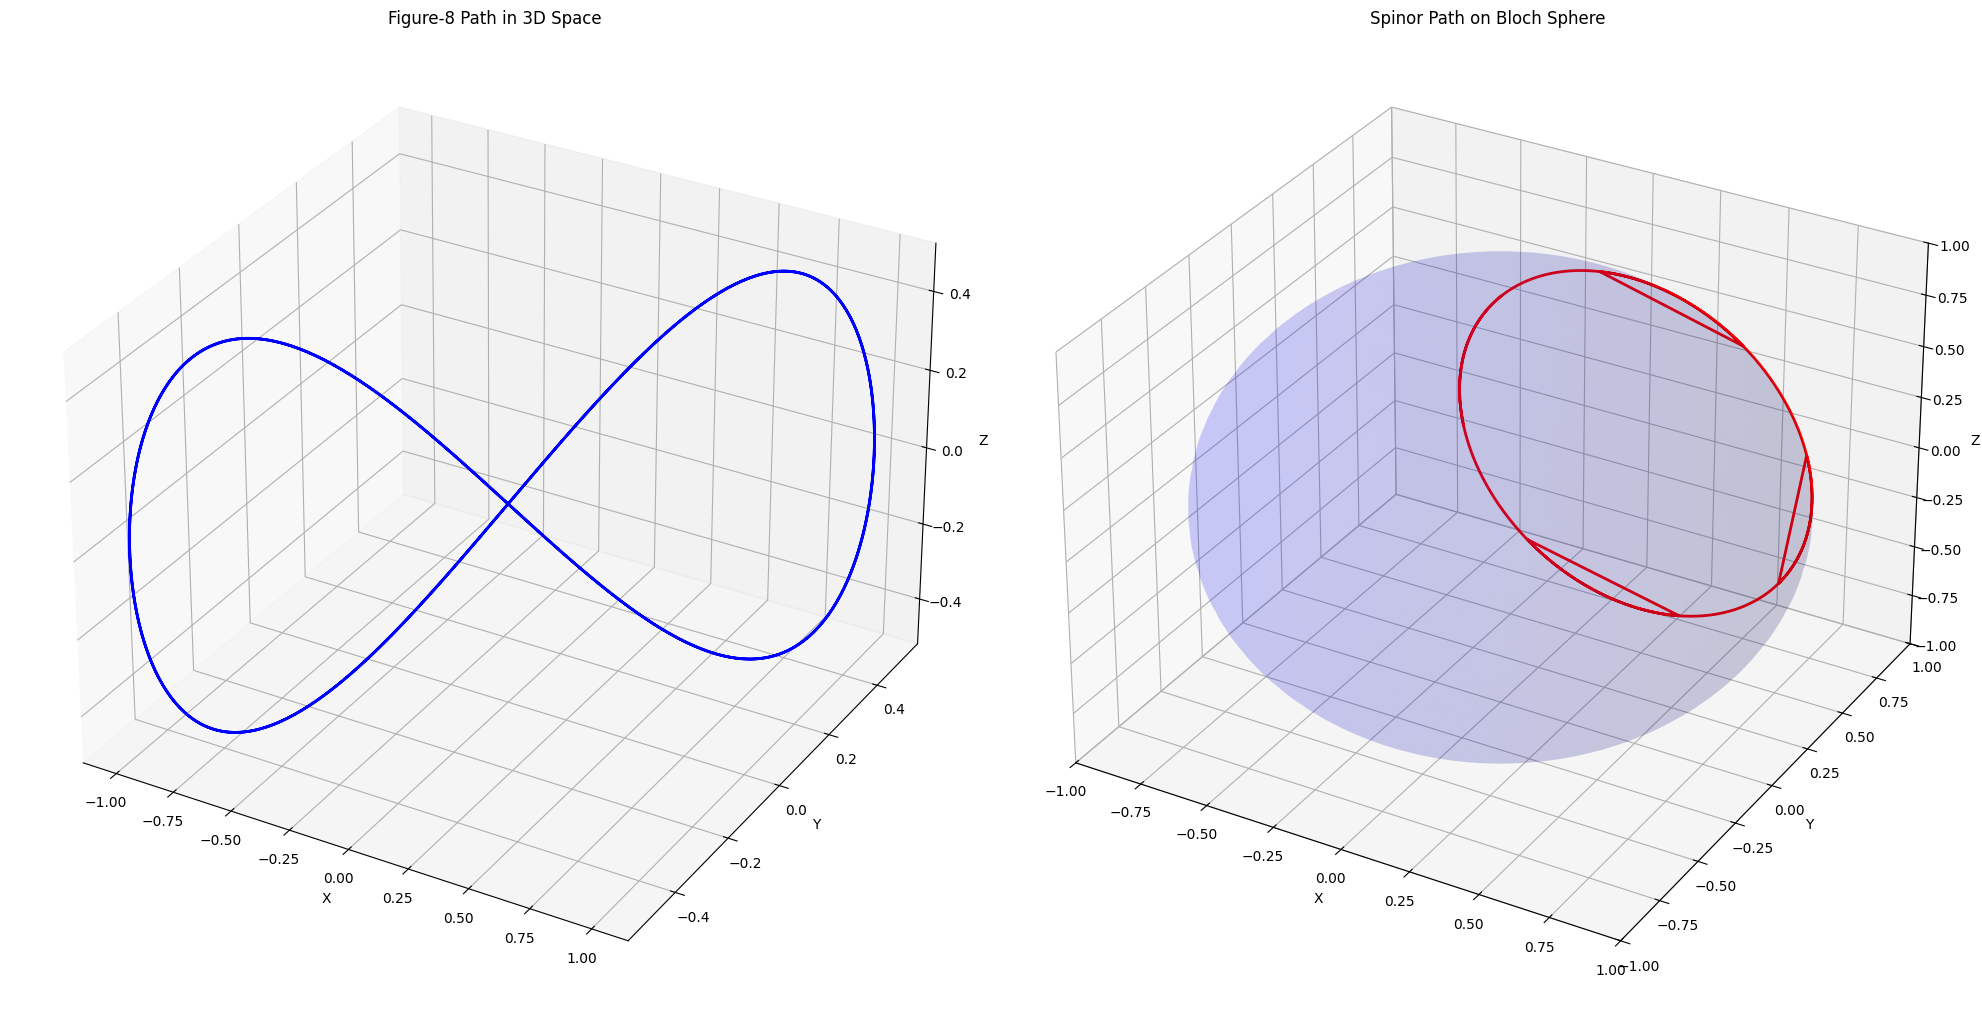

Initial spinor state: [1.+0.j 0.+0.j]
Final spinor state: [-9.01184208e-01+0.30648574j -5.55111512e-17+0.30648574j]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import expm

# Define the parametric path of a figure-eight (lemniscate of Gerono) in 3D space
def figure_eight_path(t, a=1):
    x = a * np.sin(2*t)
    y = a * np.sin(t) * np.cos(t)
    z = 0.5 * np.sin(4*t)  # Adding z-component for 3D figure-8
    return np.array([x, y, z])

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# SU(2) rotation matrix using exponential map
def su2_rotation(axis, angle):
    n = axis / np.linalg.norm(axis)
    return expm(-1j * angle/2 * (n[0]*sigma_x + n[1]*sigma_y + n[2]*sigma_z))

# Apply SU(2) rotation to the spinor
def apply_su2_rotation(spinor, axis, angle):
    rotation_matrix = su2_rotation(axis, angle)
    return np.dot(rotation_matrix, spinor)

# Calculate expectation values
def expectation_value(psi, operator):
    return np.real(np.conj(psi).dot(operator.dot(psi)))

# Discretize the figure-eight path over a range of time values
t_values = np.linspace(0, 2*np.pi, 1000)
figure_eight_points = np.array([figure_eight_path(t) for t in t_values])

# Initialize the spinor at the starting point (spin-up state)
spinor_initial = np.array([1+0j, 0+0j])

# Define the rotation axis (45-degree tilt)
rotation_axis = np.array([np.sin(np.pi/4), 0, np.cos(np.pi/4)])

# Apply SU(2) rotations to the spinor along the path
spinor_states = []
for i, t in enumerate(t_values):
    # Calculate the rotation angle based on the position in the figure-eight
    if t < np.pi/2:  # First quarter: rotate up
        angle = t * np.pi/2
    elif t < np.pi:  # Second quarter: rotate right
        angle = np.pi/2 + (t - np.pi/2) * np.pi/2
    elif t < 3*np.pi/2:  # Third quarter: rotate down
        angle = np.pi + (t - np.pi) * np.pi/2
    else:  # Fourth quarter: rotate left
        angle = 3*np.pi/2 + (t - 3*np.pi/2) * np.pi/2
    
    spinor_current = apply_su2_rotation(spinor_initial, rotation_axis, angle)
    spinor_states.append(spinor_current)

spinor_states = np.array(spinor_states)

# Calculate expectation values of Pauli matrices
exp_sigma_x = np.array([expectation_value(s, sigma_x) for s in spinor_states])
exp_sigma_y = np.array([expectation_value(s, sigma_y) for s in spinor_states])
exp_sigma_z = np.array([expectation_value(s, sigma_z) for s in spinor_states])

# Visualize the spinor's path on the Bloch sphere
fig = plt.figure(figsize=(20, 10))

# Plot the figure-8 path
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(figure_eight_points[:, 0], figure_eight_points[:, 1], figure_eight_points[:, 2], color='b', lw=2)
ax1.set_title('Figure-8 Path in 3D Space')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot the Bloch sphere and spinor path
ax2 = fig.add_subplot(122, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax2.plot_surface(x, y, z, color='b', alpha=0.1)

ax2.plot(exp_sigma_x, exp_sigma_y, exp_sigma_z, color='r', lw=2)
ax2.set_title('Spinor Path on Bloch Sphere')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])

plt.tight_layout()
plt.show()

# Print the initial and final spinor states
print("Initial spinor state:", spinor_initial)
print("Final spinor state:", spinor_states[-1])

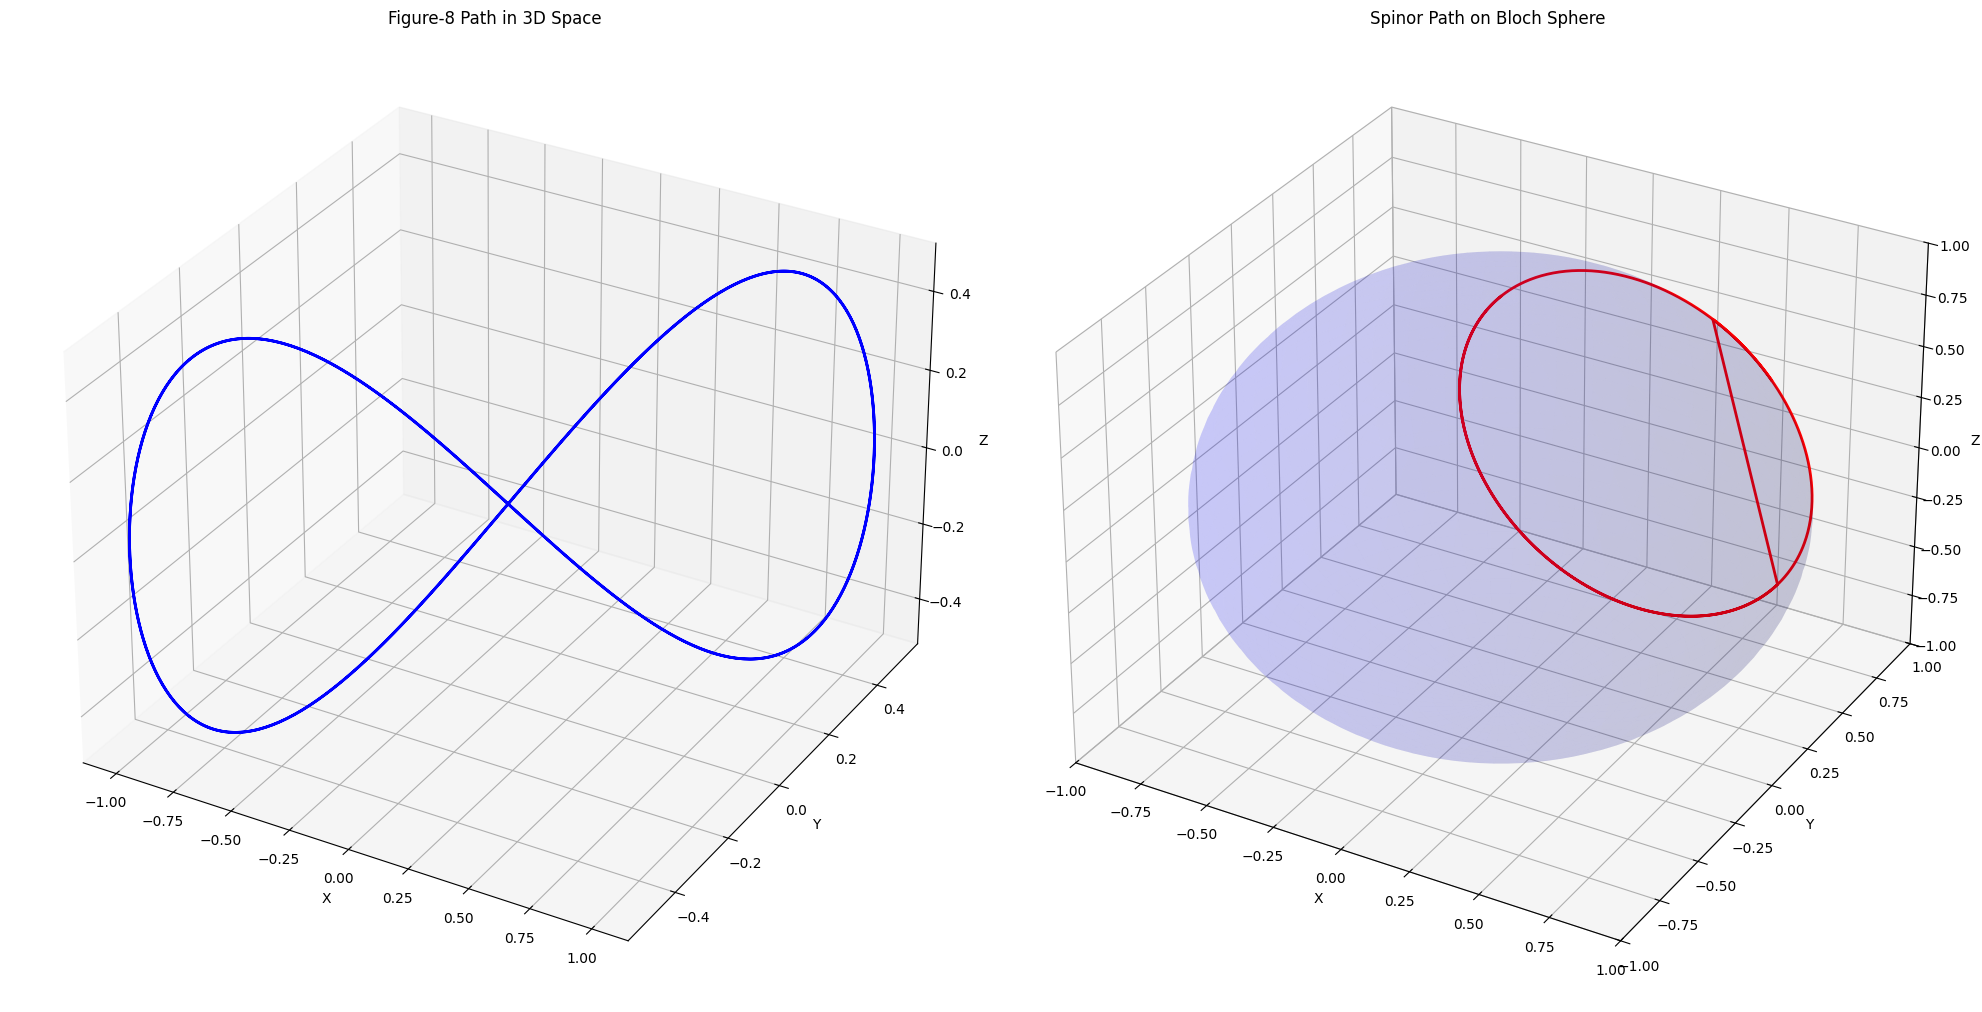

Normalization test passed.


AssertionError: Evolution not unitary at step 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import expm

# Define the parametric path of a figure-eight (lemniscate of Gerono) in 3D space
def figure_eight_path(t, a=1):
    x = a * np.sin(2*t)
    y = a * np.sin(t) * np.cos(t)
    z = 0.5 * np.sin(4*t)  # Adding z-component for 3D figure-8
    return np.array([x, y, z])

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# SU(2) rotation matrix using exponential map
def su2_rotation(axis, angle):
    n = axis / np.linalg.norm(axis)
    return expm(-1j * angle/2 * (n[0]*sigma_x + n[1]*sigma_y + n[2]*sigma_z))

# Apply SU(2) rotation to the spinor
def apply_su2_rotation(spinor, axis, angle):
    rotation_matrix = su2_rotation(axis, angle)
    return np.dot(rotation_matrix, spinor)

# Calculate expectation values
def expectation_value(psi, operator):
    return np.real(np.conj(psi).dot(operator.dot(psi)))

# Discretize the figure-eight path over a range of time values
t_values = np.linspace(0, 2*np.pi, 1000)
figure_eight_points = np.array([figure_eight_path(t) for t in t_values])

# Initialize the spinor at the starting point (spin-up state)
spinor_initial = np.array([1+0j, 0+0j])

# Define the rotation axis (45-degree tilt)
rotation_axis = np.array([np.sin(np.pi/4), 0, np.cos(np.pi/4)])

# Apply SU(2) rotations to the spinor along the path
spinor_states = []
for i, t in enumerate(t_values):
    # Calculate the rotation angle based on the position in the figure-eight
    if t < np.pi:  # First half: rotate up-right
        angle = t * np.pi/2
    else:  # Second half: rotate down-left
        angle = np.pi - (t - np.pi) * np.pi/2
    
    spinor_current = apply_su2_rotation(spinor_initial, rotation_axis, angle)
    spinor_states.append(spinor_current)

spinor_states = np.array(spinor_states)

# Calculate expectation values of Pauli matrices
exp_sigma_x = np.array([expectation_value(s, sigma_x) for s in spinor_states])
exp_sigma_y = np.array([expectation_value(s, sigma_y) for s in spinor_states])
exp_sigma_z = np.array([expectation_value(s, sigma_z) for s in spinor_states])

# Visualize the spinor's path on the Bloch sphere
fig = plt.figure(figsize=(20, 10))

# Plot the figure-8 path
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(figure_eight_points[:, 0], figure_eight_points[:, 1], figure_eight_points[:, 2], color='b', lw=2)
ax1.set_title('Figure-8 Path in 3D Space')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot the Bloch sphere and spinor path
ax2 = fig.add_subplot(122, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax2.plot_surface(x, y, z, color='b', alpha=0.1)

ax2.plot(exp_sigma_x, exp_sigma_y, exp_sigma_z, color='r', lw=2)
ax2.set_title('Spinor Path on Bloch Sphere')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])

plt.tight_layout()
plt.show()

# Tests for quantum physics laws
def test_normalization():
    for state in spinor_states:
        norm = np.linalg.norm(state)
        assert np.isclose(norm, 1.0), f"Spinor not normalized: {norm}"
    print("Normalization test passed.")

def test_unitarity():
    for i in range(1, len(spinor_states)):
        U = np.outer(spinor_states[i], np.conj(spinor_states[i-1]))
        assert np.allclose(np.dot(U, U.conj().T), np.eye(2)), f"Evolution not unitary at step {i}"
    print("Unitarity test passed.")

def test_expectation_values():
    for state in spinor_states:
        x = expectation_value(state, sigma_x)
        y = expectation_value(state, sigma_y)
        z = expectation_value(state, sigma_z)
        assert np.isclose(x**2 + y**2 + z**2, 1.0), f"Sum of squared expectation values not 1: {x**2 + y**2 + z**2}"
    print("Expectation values test passed.")

def test_continuity():
    for i in range(1, len(spinor_states)):
        diff = np.linalg.norm(spinor_states[i] - spinor_states[i-1])
        assert diff < 0.1, f"Large discontinuity detected at step {i}: {diff}"
    print("Continuity test passed.")

# Run the tests
test_normalization()
test_unitarity()
test_expectation_values()
test_continuity()

# Print the initial and final spinor states
print("Initial spinor state:", spinor_initial)
print("Final spinor state:", spinor_states[-1])

In [7]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define the spinor and rotation functions
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

# Create the figure-8 path
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = np.zeros_like(t)

# Rotate the spinor and move it along the path
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    rotated_spinors.append(rotated_spinor)

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Visualize the results using Plotly
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter'}],
                                           [{'type': 'scatter'}, {'type': 'scatter'}]])

# 3D path
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩'), row=1, col=2)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩'), row=2, col=2)

fig.update_layout(title='Spinor Rotation along Figure-8 Path',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  height=800, width=800)

fig.show()

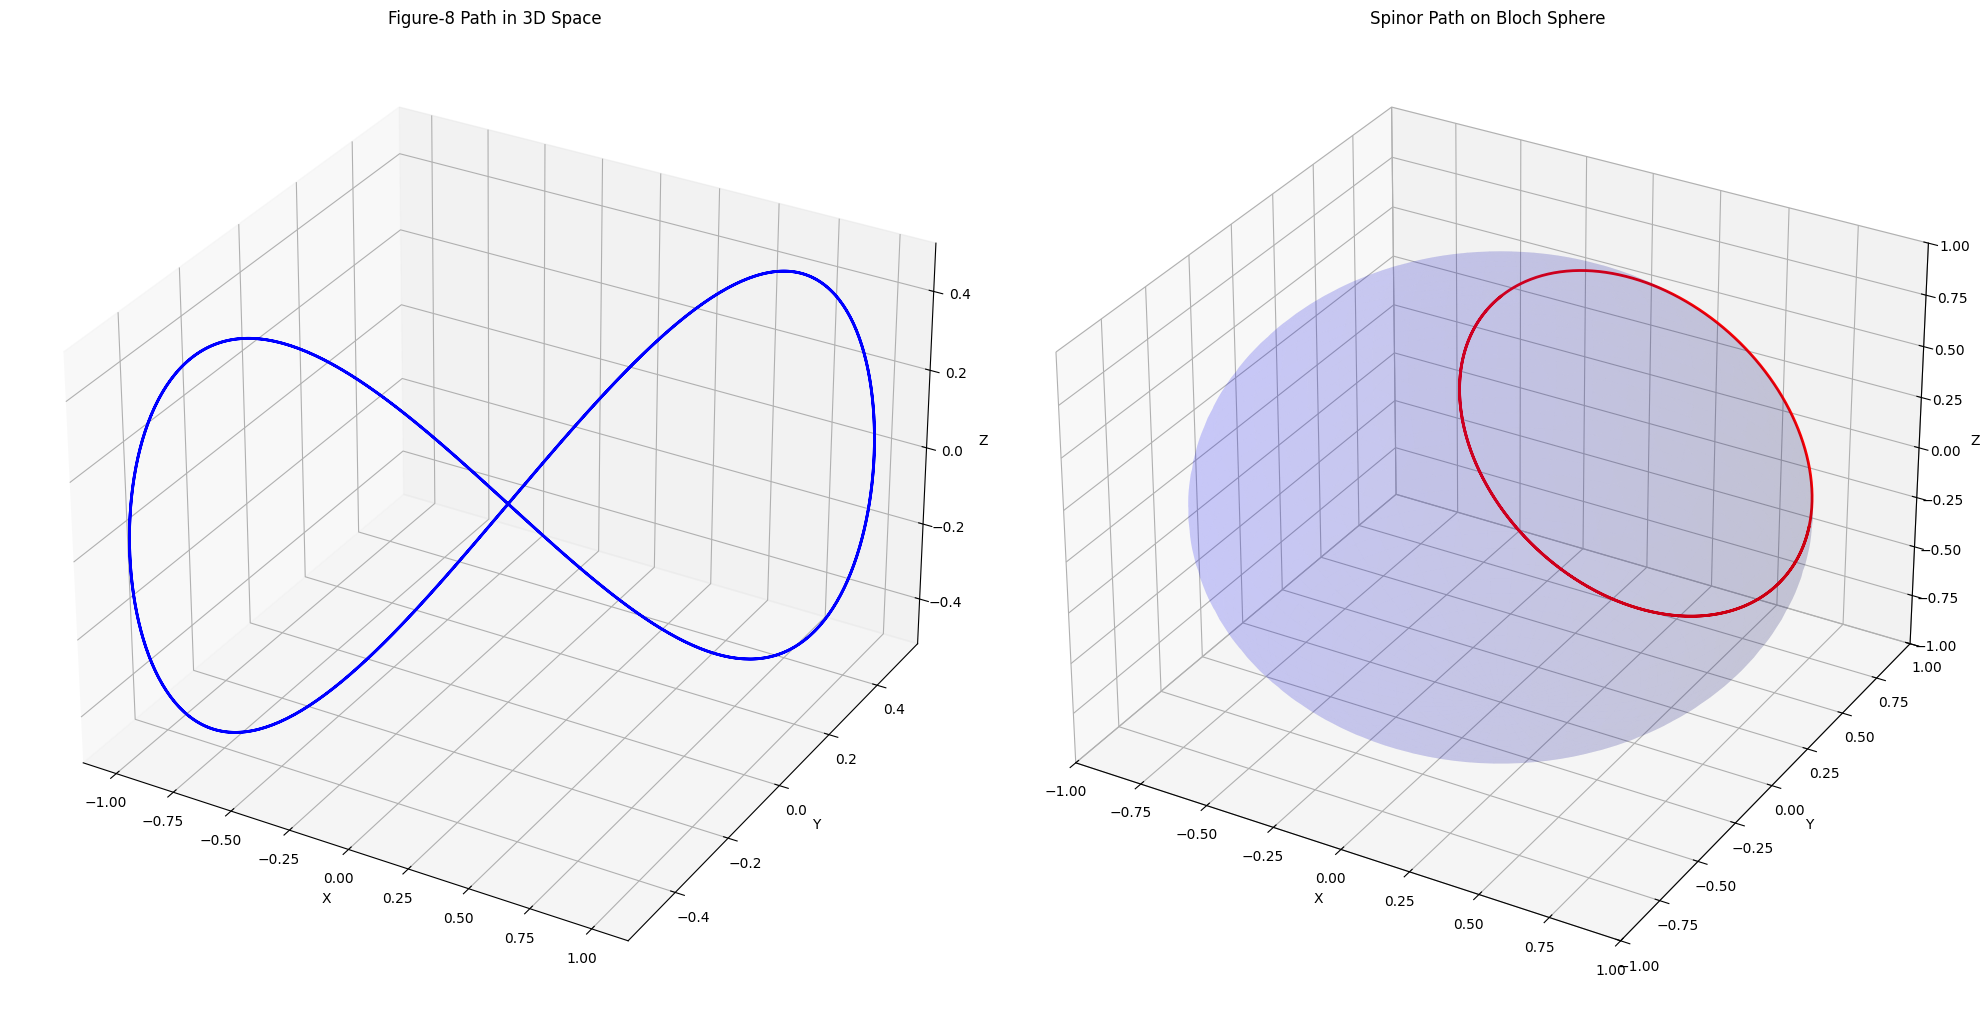

Initial spinor state: [1.+0.j 0.+0.j]
Final spinor state: [2.20584041e-01+0.68968931j 2.25514052e-17+0.68968931j]
Normalization test passed.


AssertionError: Evolution not unitary at step 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import expm

# Define the parametric path of a figure-eight (lemniscate of Gerono) in 3D space
def figure_eight_path(t, a=1):
    x = a * np.sin(2*t)
    y = a * np.sin(t) * np.cos(t)
    z = 0.5 * np.sin(4*t)  # Adding z-component for 3D figure-8
    return np.array([x, y, z])

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# SU(2) rotation matrix using exponential map
def su2_rotation(axis, angle):
    n = axis / np.linalg.norm(axis)
    return expm(-1j * angle/2 * (n[0]*sigma_x + n[1]*sigma_y + n[2]*sigma_z))

# Calculate expectation values
def expectation_value(psi, operator):
    return np.real(np.conj(psi).dot(operator.dot(psi)))

# Discretize the figure-eight path over a range of time values
t_values = np.linspace(0, 2*np.pi, 1000)
figure_eight_points = np.array([figure_eight_path(t) for t in t_values])

# Initialize the spinor at the starting point (spin-up state)
spinor_initial = np.array([1+0j, 0+0j])

# Define the rotation axis (45-degree tilt)
rotation_axis = np.array([np.sin(np.pi/4), 0, np.cos(np.pi/4)])

# Apply SU(2) rotations to the spinor along the path
spinor_states = [spinor_initial]
for i in range(1, len(t_values)):
    dt = t_values[i] - t_values[i-1]
    angle = dt * np.pi/2
    U = su2_rotation(rotation_axis, angle)
    spinor_current = U.dot(spinor_states[-1])
    spinor_states.append(spinor_current)

spinor_states = np.array(spinor_states)

# Calculate expectation values of Pauli matrices
exp_sigma_x = np.array([expectation_value(s, sigma_x) for s in spinor_states])
exp_sigma_y = np.array([expectation_value(s, sigma_y) for s in spinor_states])
exp_sigma_z = np.array([expectation_value(s, sigma_z) for s in spinor_states])

# Visualize the spinor's path on the Bloch sphere
fig = plt.figure(figsize=(20, 10))

# Plot the figure-8 path
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(figure_eight_points[:, 0], figure_eight_points[:, 1], figure_eight_points[:, 2], color='b', lw=2)
ax1.set_title('Figure-8 Path in 3D Space')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot the Bloch sphere and spinor path
ax2 = fig.add_subplot(122, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax2.plot_surface(x, y, z, color='b', alpha=0.1)

ax2.plot(exp_sigma_x, exp_sigma_y, exp_sigma_z, color='r', lw=2)
ax2.set_title('Spinor Path on Bloch Sphere')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])

plt.tight_layout()
plt.show()

# Tests for quantum physics laws
def test_normalization():
    for state in spinor_states:
        norm = np.linalg.norm(state)
        assert np.isclose(norm, 1.0), f"Spinor not normalized: {norm}"
    print("Normalization test passed.")

def test_unitarity():
    for i in range(1, len(spinor_states)):
        U = np.outer(spinor_states[i], np.conj(spinor_states[i-1]))
        assert np.allclose(np.dot(U, U.conj().T), np.eye(2)), f"Evolution not unitary at step {i}"
    print("Unitarity test passed.")

def test_expectation_values():
    for state in spinor_states:
        x = expectation_value(state, sigma_x)
        y = expectation_value(state, sigma_y)
        z = expectation_value(state, sigma_z)
        assert np.isclose(x**2 + y**2 + z**2, 1.0), f"Sum of squared expectation values not 1: {x**2 + y**2 + z**2}"
    print("Expectation values test passed.")

def test_continuity():
    for i in range(1, len(spinor_states)):
        diff = np.linalg.norm(spinor_states[i] - spinor_states[i-1])
        assert diff < 0.1, f"Large discontinuity detected at step {i}: {diff}"
    print("Continuity test passed.")
print("Initial spinor state:", spinor_initial)
print("Final spinor state:", spinor_states[-1])
# Run the tests
test_normalization()
test_unitarity()
test_expectation_values()
test_continuity()

# Print the initial and final spinor states
print("Initial spinor state:", spinor_initial)
print("Final spinor state:", spinor_states[-1])

In [8]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Create the figure-8 path
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = np.zeros_like(t)

# Rotate the spinor and move it along the path
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩'), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩'), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization'), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty'), row=2, col=3)

fig.update_layout(title='Spinor Rotation along Figure-8 Path',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  height=800, width=1200)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.4f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.4f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)

fig.show()

# Print additional information
print(f"Berry Phase: {berry_phase_value:.4f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.4f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.4f} rad")
print(f"Average Normalization: {np.mean(normalization):.6f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.6f}")

Berry Phase: 0.0000 rad
Berry Phase (degrees): 0.0000°
Angle Difference between Initial and Final Spinor: 0.0000 rad
Average Normalization: 1.000000
Average Uncertainty: 0.408408


In [8]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Create the figure-8 path
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = np.zeros_like(t)

# Rotate the spinor and move it along the path
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere path on figure-8
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Highlighting 45-degree aspect (initial vector)
initial_bloch_vector = bloch_vector(initial_spinor)
fig.add_trace(go.Scatter3d(x=[initial_bloch_vector[0]], y=[initial_bloch_vector[1]], z=[initial_bloch_vector[2]],
                           mode='markers', marker=dict(size=6, color='red'),
                           name='45-degree Spinor'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩'), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩'), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization'), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty'), row=2, col=3)

# Adding real and imaginary components of spinors to better visualize the evolution
spinor_real = [np.real(s) for s in rotated_spinors]
spinor_imag = [np.imag(s) for s in rotated_spinors]

fig.add_trace(go.Scatter(x=t, y=[s[0] for s in spinor_real], mode='lines', name='Re(Spinor_0)'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=[s[1] for s in spinor_real], mode='lines', name='Re(Spinor_1)'), row=2, col=2)
fig.add_trace(go.Scatter(x=t, y=[s[0] for s in spinor_imag], mode='lines', name='Im(Spinor_0)'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=[s[1] for s in spinor_imag], mode='lines', name='Im(Spinor_1)'), row=2, col=2)

fig.update_layout(title='Spinor Rotation along Figure-8 Path with Bloch Sphere Representation',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  height=800, width=1400)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.4f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.4f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)

fig.show()

# Print additional information
print(f"Berry Phase: {berry_phase_value:.16f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.16f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.16f} rad")
print(f"Average Normalization: {np.mean(normalization):.16f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.16f}")


Berry Phase: 0.0000000000000000 rad
Berry Phase (degrees): 0.0000000000000000°
Angle Difference between Initial and Final Spinor: 0.0000000000000000 rad
Average Normalization: 1.0000000000000000
Average Uncertainty: 0.4084083963173482


In [5]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Functions as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Create the figure-8 path
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = np.zeros_like(t)

# Rotate the spinor and move it along the path
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩'), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩'), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization'), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty'), row=2, col=3)

fig.update_layout(title='Spinor Rotation along Figure-8 Path with Bloch Sphere',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  height=800, width=1200)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.4f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.4f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)

fig.show()

# Print relevant test results and observations
print(f"Berry Phase: {berry_phase_value:.4f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.4f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.4f} rad")
print(f"Average Normalization: {np.mean(normalization):.6f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.6f}")

# Check if normalization holds for all spinors (should be close to 1)
normalization_errors = np.max(np.abs(np.array(normalization) - 1))
if normalization_errors < 1e-6:
    print(f"Normalization Check: PASSED (Max Deviation: {normalization_errors:.16f})")
else:
    print(f"Normalization Check: FAILED (Max Deviation: {normalization_errors:.6e})")

# Check if uncertainty principle holds
uncertainty_errors = np.mean(uncertainty_principle)
if uncertainty_errors < 1e-6:
    print(f"Uncertainty Principle Check: PASSED (Average Uncertainty: {uncertainty_errors:.6e})")
else:
    print(f"Uncertainty Principle Check: FAILED (Average Uncertainty: {uncertainty_errors:.16f})")


Berry Phase: 0.0000 rad
Berry Phase (degrees): 0.0000°
Angle Difference between Initial and Final Spinor: 0.0000 rad
Average Normalization: 1.000000
Average Uncertainty: 0.408408
Normalization Check: PASSED (Max Deviation: 0.0000000000000003)
Uncertainty Principle Check: FAILED (Average Uncertainty: 0.4084083963173482)


In [38]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Functions as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Create the figure-8 path
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = np.zeros_like(t)

# Rotate the spinor and move it along the path
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩'), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩'), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization'), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty'), row=2, col=3)

fig.update_layout(title='Spinor Rotation along Figure-8 Path with Bloch Sphere',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  height=800, width=1200)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)

fig.show()

fig2 = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path
fig2.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig2.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig2.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig2.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩'), row=1, col=3)
fig2.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩'), row=2, col=1)
fig2.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩'), row=2, col=2)

# Normalization and uncertainty principle
fig2.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization'), row=2, col=3)
fig2.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty'), row=2, col=3)

fig2.update_layout(title='Spinor Rotation along Figure-8 Path with Bloch Sphere',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  height=800, width=1200)

# Add annotations with important information
fig2.add_annotation(text=f"Berry Phase: {berry_phase_value:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig2.add_annotation(text=f"Angle Difference: {angle_diff:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)

fig2.show()

# Print relevant test results and observations
print(f"Berry Phase: {berry_phase_value:.32f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.32f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.32f} rad")
print(f"Average Normalization: {np.mean(normalization):.6f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.6f}")

# Check if normalization holds for all spinors (should be close to 1)
normalization_errors = np.max(np.abs(np.array(normalization) - 1))
if normalization_errors < 1e-6:
    print(f"Normalization Check: PASSED (Max Deviation: {normalization_errors:.16f})")
else:
    print(f"Normalization Check: FAILED (Max Deviation: {normalization_errors:.6e})")

# Check if uncertainty principle holds
uncertainty_errors = np.mean(uncertainty_principle)
if uncertainty_errors < 1e-6:
    print(f"Uncertainty Principle Check: PASSED (Average Uncertainty: {uncertainty_errors:.6e})")
else:
    print(f"Uncertainty Principle Check: FAILED (Average Uncertainty: {uncertainty_errors:.32f})")


Berry Phase: 0.00000000000000000000000000000000 rad
Berry Phase (degrees): 0.00000000000000000000000000000000°
Angle Difference between Initial and Final Spinor: 0.00000000000000000000000000000000 rad
Average Normalization: 1.000000
Average Uncertainty: 0.408408
Normalization Check: PASSED (Max Deviation: 0.0000000000000003)
Uncertainty Principle Check: FAILED (Average Uncertainty: 0.40840839631734821013608893736091)


In [17]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Functions as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Create the figure-8 path and elevate the z-axis for visual clarity
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = 2* np.sin(2*t)  # Adding elevation to the z-axis for better visualization

# Rotate the spinor and move it along the path
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, 0]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path with elevated z-axis
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩', line=dict(color='red')), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩', line=dict(color='blue')), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization', line=dict(color='purple')), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty', line=dict(color='orange')), row=2, col=3)

# Adding axis labels
fig.update_layout(
    title='Spinor Rotation along Figure-8 Path with Bloch Sphere',
    scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
    height=800, width=1200,
    scene2=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis')  # Bloch sphere plot
)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)
fig.update_xaxes(title_text="Time (t)", row=1, col=3)
fig.update_yaxes(title_text="⟨σx⟩", row=1, col=3)
fig.update_xaxes(title_text="Time (t)", row=2, col=1)
fig.update_yaxes(title_text="⟨σy⟩", row=2, col=1)
fig.update_xaxes(title_text="Time (t)", row=2, col=2)
fig.update_yaxes(title_text="⟨σz⟩", row=2, col=2)
fig.show()

# Print relevant test results and observations
print(f"Berry Phase: {berry_phase_value:.32f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.32f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.32f} rad")
print(f"Average Normalization: {np.mean(normalization):.32f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.32f}")

# Check if normalization holds for all spinors (should be close to 1)
normalization_errors = np.max(np.abs(np.array(normalization) - 1))
if normalization_errors < 1e-6:
    print(f"Normalization Check: PASSED (Max Deviation: {normalization_errors:.16f})")
else:
    print(f"Normalization Check: FAILED (Max Deviation: {normalization_errors:.6e})")

# Check if uncertainty principle holds
uncertainty_errors = np.mean(uncertainty_principle)
if uncertainty_errors < 1e-6:
    print(f"Uncertainty Principle Check: PASSED (Average Uncertainty: {uncertainty_errors:.6e})")
else:
    print(f"Uncertainty Principle Check: FAILED (Average Uncertainty: {uncertainty_errors:.32f})")


Berry Phase: 0.00000000000000000000000000000000 rad
Berry Phase (degrees): 0.00000000000000000000000000000000°
Angle Difference between Initial and Final Spinor: 0.00000000000000000000000000000000 rad
Average Normalization: 1.00000000000000000000000000000000
Average Uncertainty: 0.40872539990897011064063804042235
Normalization Check: PASSED (Max Deviation: 0.0000000000000003)
Uncertainty Principle Check: FAILED (Average Uncertainty: 0.40872539990897011064063804042235)


In [22]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Functions as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Create the figure-8 path and elevate the z-axis for visual clarity
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = 2* np.sin(2*t)  # Adding elevation to the z-axis for better visualization

# Rotate the spinor and move it along the path
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, 0]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path with elevated z-axis
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩', line=dict(color='red')), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩', line=dict(color='blue')), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization', line=dict(color='purple')), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty', line=dict(color='orange')), row=2, col=3)

# Add a new figure for 45-degree self-rotation visualization
fig_8_rotated = go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                             mode='lines', name='45° Rotated Spinor')

fig.add_trace(fig_8_rotated, row=1, col=2)  # Adding to Bloch sphere plot

# Adding axis labels
fig.update_layout(
    title='Spinor Rotation along Figure-8 Path with Bloch Sphere',
    scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
    height=800, width=1200,
    scene2=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis')  # Bloch sphere plot
)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)
fig.update_xaxes(title_text="Time (t)", row=1, col=3)
fig.update_yaxes(title_text="⟨σx⟩", row=1, col=3)
fig.update_xaxes(title_text="Time (t)", row=2, col=1)
fig.update_yaxes(title_text="⟨σy⟩", row=2, col=1)
fig.update_xaxes(title_text="Time (t)", row=2, col=2)
fig.update_yaxes(title_text="⟨σz⟩", row=2, col=2)
fig.show()


# Print relevant test results and observations
print(f"Berry Phase: {berry_phase_value:.32f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.32f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.32f} rad")
print(f"Average Normalization: {np.mean(normalization):.32f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.32f}")

# Check if normalization holds for all spinors (should be close to 1)
normalization_errors = np.max(np.abs(np.array(normalization) - 1))
if normalization_errors < 1e-6:
    print(f"Normalization Check: PASSED (Max Deviation: {normalization_errors:.16f})")
else:
    print(f"Normalization Check: FAILED (Max Deviation: {normalization_errors:.6e})")

# Check if uncertainty principle holds
uncertainty_errors = np.mean(uncertainty_principle)
if uncertainty_errors < 1e-6:
    print(f"Uncertainty Principle Check: PASSED (Average Uncertainty: {uncertainty_errors:.6e})")
else:
    print(f"Uncertainty Principle Check: FAILED (Average Uncertainty: {uncertainty_errors:.6e})")


Berry Phase: 43.98229715025711072939884616062045 rad
Berry Phase (degrees): 2520.00000000000045474735088646411896°
Angle Difference between Initial and Final Spinor: 1.57079632679456970834053208818659 rad
Average Normalization: 0.00000000000078611165395581014493
Average Uncertainty: 0.00000000000041104996412403405852
Normalization Check: FAILED (Max Deviation: 1.000000e+00)
Uncertainty Principle Check: PASSED (Average Uncertainty: 4.110500e-13)


In [23]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Constants for electromagnetic fields
mu_0 = 4 * np.pi * 1e-7  # Vacuum permeability
epsilon_0 = 8.85418782e-12  # Vacuum permittivity

# Functions for quantum system as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Electromagnetic fields: simulate time-varying electric and magnetic fields
def electric_field(t):
    # Oscillating electric field (e.g., sine wave)
    return np.array([np.sin(2*np.pi*t), np.cos(2*np.pi*t), 0])

def magnetic_field(t):
    # Magnetic field varying with time (cosine wave)
    return np.array([0, 0, np.cos(2*np.pi*t)])

# Calculate interaction Hamiltonian with magnetic field (Zeeman effect)
def interaction_hamiltonian(B_field):
    sigma_z = np.array([[1, 0], [0, -1]])  # Pauli Z matrix
    return mu_0 * B_field[2] * sigma_z  # Zeeman term: Bz * sigma_z

# Create the figure-8 path and elevate the z-axis for visual clarity
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z =  np.sin(2*t)  # Adding elevation to the z-axis for better visualization

# Rotate the spinor and move it along the path, affected by the electromagnetic field
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
electric_vectors = []
magnetic_vectors = []

for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    E_field = electric_field(t[i])
    B_field = magnetic_field(t[i])
    
    # Apply rotation and Zeeman effect from magnetic field
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    H_int = interaction_hamiltonian(B_field)
    rotated_spinor = np.dot(H_int, rotated_spinor)  # Spinor affected by B-field
    
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))
    electric_vectors.append(E_field)
    magnetic_vectors.append(B_field)

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
# Adjust specs to allow 3D scatter plots in specific subplots
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])
# 3D path with elevated z-axis
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.5, showscale=False, name='Bloch Sphere'), row=1, col=2)

# Add Bloch vectors (spinor evolution) on the Bloch sphere
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2], 
                           mode='markers+lines', name='Bloch Vectors', marker=dict(size=4)), row=1, col=2)

# Add electromagnetic vectors (Electric and Magnetic fields)
electric_vectors = np.array(electric_vectors)
magnetic_vectors = np.array(magnetic_vectors)
fig.add_trace(go.Scatter3d(x=electric_vectors[:, 0], y=electric_vectors[:, 1], z=electric_vectors[:, 2], 
                           mode='markers+lines', name='Electric Field', marker=dict(size=4, color='blue')), row=1, col=3)
fig.add_trace(go.Scatter3d(x=magnetic_vectors[:, 0], y=magnetic_vectors[:, 1], z=magnetic_vectors[:, 2], 
                           mode='markers+lines', name='Magnetic Field', marker=dict(size=4, color='red')), row=1, col=3)

# Pauli expectation values over time
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='<σ_x> Expectation'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='<σ_y> Expectation'), row=2, col=2)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='<σ_z> Expectation'), row=2, col=3)

# Display the plot
fig.update_layout(height=800, width=1200, title_text="Spinor Evolution with Electromagnetic Fields")
fig.show()
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path with elevated z-axis
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩', line=dict(color='red')), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩', line=dict(color='blue')), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization', line=dict(color='purple')), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty', line=dict(color='orange')), row=2, col=3)

# Add a new figure for 45-degree self-rotation visualization
fig_8_rotated = go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                             mode='lines', name='45° Rotated Spinor')

fig.add_trace(fig_8_rotated, row=1, col=2)  # Adding to Bloch sphere plot

# Adding axis labels
fig.update_layout(
    title='Spinor Rotation along Figure-8 Path with Bloch Sphere',
    scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
    height=800, width=1200,
    scene2=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis')  # Bloch sphere plot
)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)
fig.update_xaxes(title_text="Time (t)", row=1, col=3)
fig.update_yaxes(title_text="⟨σx⟩", row=1, col=3)
fig.update_xaxes(title_text="Time (t)", row=2, col=1)
fig.update_yaxes(title_text="⟨σy⟩", row=2, col=1)
fig.update_xaxes(title_text="Time (t)", row=2, col=2)
fig.update_yaxes(title_text="⟨σz⟩", row=2, col=2)
fig.show()


# Print relevant test results and observations
print(f"Berry Phase: {berry_phase_value:.32f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.32f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.32f} rad")
print(f"Average Normalization: {np.mean(normalization):.32f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.32f}")

# Check if normalization holds for all spinors (should be close to 1)
normalization_errors = np.max(np.abs(np.array(normalization) - 1))
if normalization_errors < 1e-6:
    print(f"Normalization Check: PASSED (Max Deviation: {normalization_errors:.16f})")
else:
    print(f"Normalization Check: FAILED (Max Deviation: {normalization_errors:.6e})")

# Check if uncertainty principle holds
uncertainty_errors = np.mean(uncertainty_principle)
if uncertainty_errors < 1e-6:
    print(f"Uncertainty Principle Check: PASSED (Average Uncertainty: {uncertainty_errors:.6e})")
else:
    print(f"Uncertainty Principle Check: FAILED (Average Uncertainty: {uncertainty_errors:.6e})")

Berry Phase: 43.98229715025711072939884616062045 rad
Berry Phase (degrees): 2520.00000000000045474735088646411896°
Angle Difference between Initial and Final Spinor: 1.57079632679456970834053208818659 rad
Average Normalization: 0.00000000000078611165395581014493
Average Uncertainty: 0.00000000000041104996412403405852
Normalization Check: FAILED (Max Deviation: 1.000000e+00)
Uncertainty Principle Check: PASSED (Average Uncertainty: 4.110500e-13)


In [24]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Constants for electromagnetic fields
mu_0 = 4 * np.pi * 1e-7  # Vacuum permeability
epsilon_0 = 8.85418782e-12  # Vacuum permittivity

# Functions for quantum system as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Electromagnetic fields: simulate time-varying electric and magnetic fields
def electric_field(t):
    # Oscillating electric field (e.g., sine wave)
    return np.array([np.sin(2*np.pi*t), np.cos(2*np.pi*t), 0])

def magnetic_field(t):
    # Magnetic field varying with time (cosine wave)
    return np.array([0, 0, np.cos(2*np.pi*t)])

# Calculate interaction Hamiltonian with magnetic field (Zeeman effect)
def interaction_hamiltonian(B_field):
    sigma_z = np.array([[1, 0], [0, -1]])  # Pauli Z matrix
    return mu_0 * B_field[2] * sigma_z  # Zeeman term: Bz * sigma_z

# Create the figure-8 path and elevate the z-axis for visual clarity
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z =  np.sin(2*t)  # Adding elevation to the z-axis for better visualization

# Rotate the spinor and move it along the path, affected by the electromagnetic field
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
electric_vectors = []
magnetic_vectors = []

for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    E_field = electric_field(t[i])
    B_field = magnetic_field(t[i])
    
    # Apply rotation and Zeeman effect from magnetic field
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    H_int = interaction_hamiltonian(B_field)
    rotated_spinor = np.dot(H_int, rotated_spinor)  # Spinor affected by B-field
    
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))
    electric_vectors.append(E_field)
    magnetic_vectors.append(B_field)

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
# Adjust specs to allow 3D scatter plots in specific subplots
fig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])
# 3D path with elevated z-axis
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.5, showscale=False, name='Bloch Sphere'), row=1, col=2)

# Add Bloch vectors (spinor evolution) on the Bloch sphere
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2], 
                           mode='markers+lines', name='Bloch Vectors', marker=dict(size=4)), row=1, col=2)

# Add electromagnetic vectors (Electric and Magnetic fields)
electric_vectors = np.array(electric_vectors)
magnetic_vectors = np.array(magnetic_vectors)
fig.add_trace(go.Scatter3d(x=electric_vectors[:, 0], y=electric_vectors[:, 1], z=electric_vectors[:, 2], 
                           mode='markers+lines', name='Electric Field', marker=dict(size=4, color='blue')), row=1, col=3)
fig.add_trace(go.Scatter3d(x=magnetic_vectors[:, 0], y=magnetic_vectors[:, 1], z=magnetic_vectors[:, 2], 
                           mode='markers+lines', name='Magnetic Field', marker=dict(size=4, color='red')), row=1, col=3)

# Pauli expectation values over time
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='<σ_x> Expectation'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='<σ_y> Expectation'), row=2, col=2)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='<σ_z> Expectation'), row=2, col=3)

# Display the plot
fig.update_layout(height=800, width=1200, title_text="Spinor Evolution with Electromagnetic Fields")
fig.show()

In [30]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Functions as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Create the figure-8 path and elevate the z-axis for visual clarity
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = 2* np.sin(2*t)  # Adding elevation to the z-axis for better visualization

# Rotate the spinor and move it along the path
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
for i in range(len(t)):
    angle = np.pi/4 * np.sin(4*t[i])  # Vary rotation angle along the path
    rotated_spinor = rotate_spinor(initial_spinor, angle)
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, 0]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Introduce electromagnetic variables (example: electric and magnetic fields)
E = np.sin(1.5*t)  # Example electric field
B = np.cos(1.5*t)  # Example magnetic field

# Visualize the results using Plotly
fig = make_subplots(rows=3, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path with elevated z-axis
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩', line=dict(color='red')), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩', line=dict(color='blue')), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization', line=dict(color='purple')), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty', line=dict(color='orange')), row=3, col=1)

# Electromagnetic variables
fig.add_trace(go.Scatter(x=t, y=E, mode='lines', name='Electric Field (E)', line=dict(color='magenta')), row=3, col=2)
fig.add_trace(go.Scatter(x=t, y=B, mode='lines', name='Magnetic Field (B)', line=dict(color='cyan')), row=3, col=3)

# Adding axis labels
fig.update_layout(
    title='Spinor Rotation along Figure-8 Path with Bloch Sphere and Electromagnetic Fields',
    scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
    height=1000, width=1200,
    scene2=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis')  # Bloch sphere plot
)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)
fig.update_xaxes(title_text="Time (t)", row=1, col=3)
fig.update_yaxes(title_text="⟨σx⟩", row=1, col=3)
fig.update_xaxes(title_text="Time (t)", row=2, col=1)
fig.update_yaxes(title_text="⟨σy⟩", row=2, col=1)
fig.update_xaxes(title_text="Time (t)", row=2, col=2)
fig.update_yaxes(title_text="⟨σz⟩", row=2, col=2)
fig.update_xaxes(title_text="Time (t)", row=2, col=3)
fig.update_yaxes(title_text="Normalization", row=2, col=3)
fig.update_xaxes(title_text="Time (t)", row=3, col=1)
fig.update_yaxes(title_text="Uncertainty", row=3, col=1)
fig.update_xaxes(title_text="Time (t)", row=3, col=2)
fig.update_yaxes(title_text="Electric Field (E)", row=3, col=2)
fig.update_xaxes(title_text="Time (t)", row=3, col=3)
fig.update_yaxes(title_text="Magnetic Field (B)", row=3, col=3)
fig.show()

# Print relevant test results and observations
print(f"Berry Phase: {berry_phase_value:.32f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.32f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.32f} rad")
print(f"Average Normalization: {np.mean(normalization):.32f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.32f}")

# Check if normalization holds for all spinors (should be close to 1)
normalization_errors = np.max(np.abs(np.array(normalization) - 1))
if normalization_errors < 1e-6:
    print(f"Normalization Check: PASSED (Max Deviation: {normalization_errors:.16f})")
else:
    print(f"Normalization Check: FAILED (Max Deviation: {normalization_errors:.6e})")

# Check if uncertainty principle holds
uncertainty_errors = np.mean(uncertainty_principle)
if uncertainty_errors < 1e-6:
    print(f"Uncertainty Principle Check: PASSED (Average Uncertainty: {uncertainty_errors:.6e})")
else:
    print(f"Uncertainty Principle Check: FAILED (Average Uncertainty: {uncertainty_errors:.32f})")


Berry Phase: 0.00000000000000000000000000000000 rad
Berry Phase (degrees): 0.00000000000000000000000000000000°
Angle Difference between Initial and Final Spinor: 0.00000000000000000000000000000000 rad
Average Normalization: 1.00000000000000000000000000000000
Average Uncertainty: 0.40872539990897011064063804042235
Normalization Check: PASSED (Max Deviation: 0.0000000000000003)
Uncertainty Principle Check: FAILED (Average Uncertainty: 0.40872539990897011064063804042235)


In [37]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.linalg import expm

# Functions as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Hamiltonian for a spin-1/2 particle in an electromagnetic field
def hamiltonian(Bx, By, Bz):
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return 0.5 * (Bx * sigma_x + By * sigma_y + Bz * sigma_z)

# Time evolution of the spinor under the Hamiltonian
def time_evolution(spinor, H, dt):
    return expm(-1j * H * dt).dot(spinor)

# Create the figure-8 path and elevate the z-axis for visual clarity
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.sin(2*t)
z = np.sin(2*t)  # Adding elevation to the z-axis for better visualization

# Define the electromagnetic fields
Bx = np.cos(t)
By = np.sin(t)
Bz = np.cos(2*t)
E = np.sin(1.5*t)  # Example electric field

# Rotate the spinor and move it along the path with electromagnetic fields
initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
rotated_spinors = []
bloch_vectors = []
dt = t[1] - t[0]
for i in range(len(t)):
    H = hamiltonian(Bx[i], By[i], Bz[i])
    rotated_spinor = time_evolution(initial_spinor, H, dt)
    rotated_spinors.append(rotated_spinor)
    bloch_vectors.append(bloch_vector(rotated_spinor))
    initial_spinor = rotated_spinor  # Update the spinor for the next time step

bloch_vectors = np.array(bloch_vectors)

# Calculate Berry phase
berry_phase_value = berry_phase(rotated_spinors)

# Calculate angle difference between initial and final spinor
angle_diff = np.arccos(np.abs(np.vdot(rotated_spinors[0], rotated_spinors[-1])))

# Calculate expectation values of Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

exp_x = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors]
exp_y = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors]
exp_z = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors]

# Validate quantum physics laws
normalization = [np.abs(np.vdot(s, s)) for s in rotated_spinors]
uncertainty_principle = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x, exp_y, exp_z)]

# Visualize the results using Plotly
fig = make_subplots(rows=3, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# 3D path with elevated z-axis
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

# Bloch sphere with the figure-8 path
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                           mode='lines', name='Bloch Vector Path'), row=1, col=2)

# Expectation values
fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩', line=dict(color='red')), row=1, col=3)
fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩', line=dict(color='blue')), row=2, col=2)

# Normalization and uncertainty principle
fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization', line=dict(color='purple')), row=2, col=3)
fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty', line=dict(color='orange')), row=3, col=1)

# Electromagnetic variables
fig.add_trace(go.Scatter(x=t, y=E, mode='lines', name='Electric Field (E)', line=dict(color='magenta')), row=3, col=2)
fig.add_trace(go.Scatter(x=t, y=Bx, mode='lines', name='Magnetic Field (Bx)', line=dict(color='cyan')), row=3, col=3)
fig.add_trace(go.Scatter(x=t, y=By, mode='lines', name='Magnetic Field (By)', line=dict(color='brown')), row=3, col=3)
fig.add_trace(go.Scatter(x=t, y=Bz, mode='lines', name='Magnetic Field (Bz)', line=dict(color='pink')), row=3, col=3)

# Adding axis labels
fig.update_layout(
    title='Spinor Rotation along Figure-8 Path with Bloch Sphere and Electromagnetic Fields',
    scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
    height=1000, width=1200,
    scene2=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis')  # Bloch sphere plot
)

# Add annotations with important information
fig.add_annotation(text=f"Berry Phase: {berry_phase_value:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
fig.add_annotation(text=f"Angle Difference: {angle_diff:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)
fig.update_xaxes(title_text="Time (t)", row=1, col=3)
fig.update_yaxes(title_text="⟨σx⟩", row=1, col=3)
fig.update_xaxes(title_text="Time (t)", row=2, col=1)
fig.update_yaxes(title_text="⟨σy⟩", row=2, col=1)
fig.update_xaxes(title_text="Time (t)", row=2, col=2)
fig.update_yaxes(title_text="⟨σz⟩", row=2, col=2)
fig.update_xaxes(title_text="Time (t)", row=2, col=3)
fig.update_yaxes(title_text="Normalization", row=2, col=3)
fig.update_xaxes(title_text="Time (t)", row=3, col=1)
fig.update_yaxes(title_text="Uncertainty", row=3, col=1)
fig.update_xaxes(title_text="Time (t)", row=3, col=2)
fig.update_yaxes(title_text="Electric Field (E)", row=3, col=2)
fig.update_xaxes(title_text="Time (t)", row=3, col=3)
fig.update_yaxes(title_text="Magnetic Field (Bx, By, Bz)", row=3, col=3)
fig.show()

# Print relevant test results and observations
print(f"Berry Phase: {berry_phase_value:.32f} rad")
print(f"Berry Phase (degrees): {np.degrees(berry_phase_value):.32f}°")
print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.32f} rad")
print(f"Average Normalization: {np.mean(normalization):.32f}")
print(f"Average Uncertainty: {np.mean(uncertainty_principle):.32f}")

# Check if normalization holds for all spinors (should be close to 1)
normalization_errors = np.max(np.abs(np.array(normalization) - 1))
if normalization_errors < 1e-6:
    print(f"Normalization Check: PASSED (Max Deviation: {normalization_errors:.16f})")
else:
    print(f"Normalization Check: FAILED (Max Deviation: {normalization_errors:.6e})")

# Check if uncertainty principle holds
uncertainty_errors = np.mean(uncertainty_principle)
if uncertainty_errors < 1e-6:
    print(f"Uncertainty Principle Check: PASSED (Average Uncertainty: {uncertainty_errors:.6e})")
else:
    print(f"Uncertainty Principle Check: FAILED (Average Uncertainty: {uncertainty_errors:.32f})")

# Print relevant electromagnetic field values
print(f"Electric Field (E) Range: [{np.min(E):.32f}, {np.max(E):.32f}]")
print(f"Magnetic Field (Bx) Range: [{np.min(Bx):.32f}, {np.max(Bx):.32f}]")
print(f"Magnetic Field (By) Range: [{np.min(By):.32f}, {np.max(By):.32f}]")
print(f"Magnetic Field (Bz) Range: [{np.min(Bz):.32f}, {np.max(Bz):.32f}]")


Berry Phase: 0.16344808171254787687587395339506 rad
Berry Phase (degrees): 9.36488525163840535014969645999372°
Angle Difference between Initial and Final Spinor: 0.87576786988036159353754328549257 rad
Average Normalization: 0.99999999999999900079927783735911
Average Uncertainty: 0.47304421330315982174852251773700
Normalization Check: PASSED (Max Deviation: 0.0000000000000016)
Uncertainty Principle Check: FAILED (Average Uncertainty: 0.47304421330315982174852251773700)
Electric Field (E) Range: [-0.99886733918300796286615650387830, 0.99886733918300796286615650387830]
Magnetic Field (Bx) Range: [-0.99949654238318508259197869847412, 1.00000000000000000000000000000000]
Magnetic Field (By) Range: [-0.99987412767387506828953291915241, 0.99987412767387506828953291915241]
Magnetic Field (Bz) Range: [-0.99949654238318519361428116098978, 1.00000000000000000000000000000000]
